<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/chronic_kidney_diseases_prediction_updated_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)


In [767]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [768]:
!kaggle datasets download -d mansoordaku/ckdisease

ckdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [769]:
import zipfile
zip = zipfile.ZipFile("/content/ckdisease.zip",'r')
zip.extractall("/content")
zip.close()

In [770]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [771]:
df=pd.read_csv('kidney_disease.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [772]:
df.shape

(400, 25)

In [773]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [774]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [775]:
df.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
217,63.0,100.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,78.0,...,36,10500,4.3,no,yes,no,good,no,no,ckd
307,47.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,...,44,7900,4.5,no,no,no,good,no,no,notckd
161,62.0,NaN,1.015,3.0,0.0,abnormal,NaN,notpresent,notpresent,NaN,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
299,73.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,127.0,...,52,11000,4.7,no,no,no,good,no,no,notckd
370,69.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,50,9300,5.4,no,no,no,good,no,no,notckd


In [776]:
# Number of times to replicate the DataFrame
replications = 500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_500r = pd.DataFrame(expanded_df)

<ipython-input-776-cfa04b57b5f5>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [777]:
# Number of times to replicate the DataFrame
replications = 1500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 1500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_1500r = pd.DataFrame(expanded_df)

<ipython-input-777-a40a364fd13d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [778]:
df_1500r.shape

(1500, 25)

In [779]:
# Number of times to replicate the DataFrame
replications = 2500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 2500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_2500r = pd.DataFrame(expanded_df)

<ipython-input-779-10f9cd8e441c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [780]:
df_2500r.shape

(2500, 25)

In [781]:
# Number of times to replicate the DataFrame
replications = 5500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 5500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 5500 rows
df_5500r = pd.DataFrame(expanded_df)

<ipython-input-781-60fcd4c75198>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [782]:
df_5500r.shape

(5500, 25)

In [783]:
df=df_500r

In [784]:
df['classification'].value_counts()

ckd       347
notckd    150
ckd\t       3
Name: classification, dtype: int64

### **Data Preparations**
1. Data Cleaning
2. Data Explorations
3. Data Splitting
4. Feature Engineering
5. Model Training
6. Model Improvements

### **1. Data Cleaning**

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             489 non-null    float64
 1   bp              486 non-null    float64
 2   sg              438 non-null    float64
 3   al              441 non-null    float64
 4   su              437 non-null    float64
 5   rbc             291 non-null    object 
 6   pc              415 non-null    object 
 7   pcc             496 non-null    object 
 8   ba              496 non-null    object 
 9   bgr             439 non-null    float64
 10  bu              476 non-null    float64
 11  sc              479 non-null    float64
 12  sod             379 non-null    float64
 13  pot             377 non-null    float64
 14  hemo            432 non-null    float64
 15  pcv             405 non-null    object 
 16  wc              357 non-null    object 
 17  rc              328 non-null    obj

In [786]:
df.isnull().sum()

age                11
bp                 14
sg                 62
al                 59
su                 63
rbc               209
pc                 85
pcc                 4
ba                  4
bgr                61
bu                 24
sc                 21
sod               121
pot               123
hemo               68
pcv                95
wc                143
rc                172
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [787]:
age_m=df['age'].mean()
df['age']=df['age'].fillna(age_m)

In [788]:
df['age']=df['age'].astype(int)

In [789]:
bp_mean=df['bp'].mean()
df['bp']=df['bp'].fillna(bp_mean)

In [790]:
sg_m=df['sg'].mean()
df['sg']=df['sg'].fillna(sg_m)

In [791]:
al_m=df['al'].mean()
df['al']=df['al'].fillna(al_m)

In [792]:
su_m=df['su'].mean()
df['su']=df['su'].fillna(su_m)

In [793]:
rbc_m=df['rbc'].mode()
print(rbc_m)
df['rbc']=df['rbc'].fillna('normal')

0    normal
Name: rbc, dtype: object


In [794]:
pc_m=df['pc'].mode()
print(pc_m)
df['pc']=df['pc'].fillna('normal')

0    normal
Name: pc, dtype: object


In [795]:
pcc_m=df['pcc'].mode()
print(pcc_m)
df['pcc']=df['pcc'].fillna('notpresent')

0    notpresent
Name: pcc, dtype: object


In [796]:
ba_m=df['ba'].mode()
print(ba_m)
df['ba']=df['ba'].fillna('notpresent')

0    notpresent
Name: ba, dtype: object


In [797]:
bgr_m=df['bgr'].mean()
df['bgr']=df['bgr'].fillna(bgr_m)

In [798]:
bu_m=df['bu'].mean()
df['bu']=df['bu'].fillna(bu_m)

In [799]:
sc_m=df['sc'].mean()
df['sc']=df['sc'].fillna(sc_m)

In [800]:
sod_m=df['sod'].mean()
df['sod']=df['sod'].fillna(sod_m)

In [801]:
pot_m=df['pot'].mean()
df['pot']=df['pot'].fillna(pot_m)

In [802]:
hemo_m=df['hemo'].mean()
print(hemo_m)
df['hemo']=df['hemo'].fillna(12.52)

12.172685185185186


In [803]:
pcv_m=df['pcv'].mode()
pcv_m

0    52
Name: pcv, dtype: object

In [804]:
df['pcv']=df['pcv'].fillna('52')

In [805]:
wc_m=df['wc'].mode()
print(wc_m)
df['wc']=df['wc'].fillna('9800')

0    9800
Name: wc, dtype: object


In [806]:
rc_m=df['rc'].mode()
print(rc_m)
df['rc']=df['rc'].fillna('5.2')

0    5.2
Name: rc, dtype: object


In [807]:
htn_m=df['htn'].mode()
print(htn_m)
df['htn']=df['htn'].fillna('no')

0    no
Name: htn, dtype: object


In [808]:
dm_m=df['dm'].mode()
print(dm_m)
df['dm']=df['dm'].fillna('no')

0    no
Name: dm, dtype: object


In [809]:
cad_m=df['cad'].mode()
print(cad_m)
df['cad']=df['cad'].fillna('no')

0    no
Name: cad, dtype: object


In [810]:
appet_m=df['appet'].mode()
print(appet_m)
df['appet']=df['appet'].fillna('good')

0    good
Name: appet, dtype: object


In [811]:
pe_m=df['pe'].mode()
print(pe_m)
df['pe']=df['pe'].fillna('no')

0    no
Name: pe, dtype: object


In [812]:
ane_m=df['ane'].mode()
print(ane_m)
df['ane']=df['ane'].fillna('no')

0    no
Name: ane, dtype: object


In [813]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [814]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,52.384000,77.345679,1.016621,1.160998,0.505721,152.687927,60.252521,3.360334,136.707124,4.676393,12.219920
std,16.720397,14.232251,0.005390,1.281571,1.086661,78.049189,50.606341,6.295295,10.551714,2.971636,2.674246
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,44.000000,70.000000,1.010000,0.000000,0.000000,102.000000,28.000000,1.000000,135.000000,4.000000,10.300000
50%,55.000000,80.000000,1.016621,1.000000,0.000000,130.000000,46.000000,1.600000,136.707124,4.676393,12.520000
75%,65.000000,80.000000,1.020000,2.000000,0.505721,159.000000,70.250000,3.360334,140.000000,4.800000,14.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [815]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [816]:
df['classification']=df['classification'].str.replace('ckd\t','ckd')

In [817]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [818]:
unique_cat=[]
for i,v in enumerate(df.columns):
    if df[v].dtype == 'object':
        unique_cat.append(f"{v}:- {df[v].unique()}")

In [819]:
unique_cat

["rbc:- ['normal' 'abnormal']",
 "pc:- ['normal' 'abnormal']",
 "pcc:- ['notpresent' 'present']",
 "ba:- ['notpresent' 'present']",
 "pcv:- ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '52' '16' '24' '37'\n '30' '34' '40' '45' '27' '48' '\\t?' '14' '22' '18' '42' '17' '46' '23'\n '19' '25' '41' '26' '15' '21' '43' '20' '\\t43' '47' '9' '49' '50' '53'\n '51' '54']",
 "wc:- ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'\n '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'\n '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'\n '7700' '14600' '6300' '\\t6200' '7100' '11800' '9400' '5500' '5800'\n '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'\n '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'\n '12400' '\\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'\n '12800' '11200' '19100' '\\t?' '12300' '16700' '2600' '26400' '8800'\n '7400' '4900' '8000' '12000' '15700' '410

In [820]:
##Regex Library
import re


def clean_regex(column_values):
    cleaned_values = []
    for item in column_values:
        cleaned_item = re.sub(r'[\n\t\'\[\]]', '', str(item))
        cleaned_values.append(cleaned_item)
    return cleaned_values

In [821]:
df['pcv'] = clean_regex(df['pcv'].values)

print(df['pcv'].unique())
print("PCV lenght:- ",len(df['pcv']))

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '52' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '?' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
PCV lenght:-  500


In [822]:
df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value

<ipython-input-822-020152f9962c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value


In [823]:
df['wc'] = clean_regex(df['wc'].values)

In [824]:
wc_m=df['wc'].mode()
wc_m

0    9800
Name: wc, dtype: object

In [825]:
df['wc']=df['wc'].str.replace('?','9800')
print(df['wc'].unique())
print("Wc lenght:- ",len(df['wc']))

['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
Wc lenght:-  500


<ipython-input-825-bcd4385e20df>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['wc']=df['wc'].str.replace('?','9800')


In [826]:
df['rc'] = clean_regex(df['rc'].values)

In [827]:
df['rc'].unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '?', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [828]:
for i in range(len(df['dm'])):
    if df['dm'].values[i] == '\tno':
        df['dm'][i] = df['dm'][i].replace('\tno', 'no')
    elif df['dm'].values[i] == '\\tyes':
        df['dm'][i] = df['dm'][i].replace('\\tyes', 'yes')
    elif df['dm'].values[i]==' yes':
        df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
    elif df['dm'].values[i]=='\tyes':
        df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')

<ipython-input-828-a63fac1e8500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
<ipython-input-828-a63fac1e8500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tno', 'no')
<ipython-input-828-a63fac1e8500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')


In [829]:
df['dm'].unique()

array(['yes', 'no'], dtype=object)

In [830]:
for i in range(len(df['cad'])):
    if df['cad'].values[i] == '\tno':
        df['cad'][i] = df['cad'][i].replace('\tno', 'no')

<ipython-input-830-f2fca49e0381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cad'][i] = df['cad'][i].replace('\tno', 'no')


In [831]:
df['cad'].unique()

array(['no', 'yes'], dtype=object)

### **2. Data Exploration**

In [832]:
##importing the required library for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [833]:
cat = []
cat_i = []
num = []
num_i = []

for i, v in enumerate(df.columns):
    if df[v].dtypes in ['float64','int64']: #== 'float64' or df[v].dtypes == 'int64':
        num.append(v)
        num_i.append(i)
    else:
        cat.append(v)
        cat_i.append(i)

In [834]:
cat,num

(['rbc',
  'pc',
  'pcc',
  'ba',
  'pcv',
  'wc',
  'rc',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

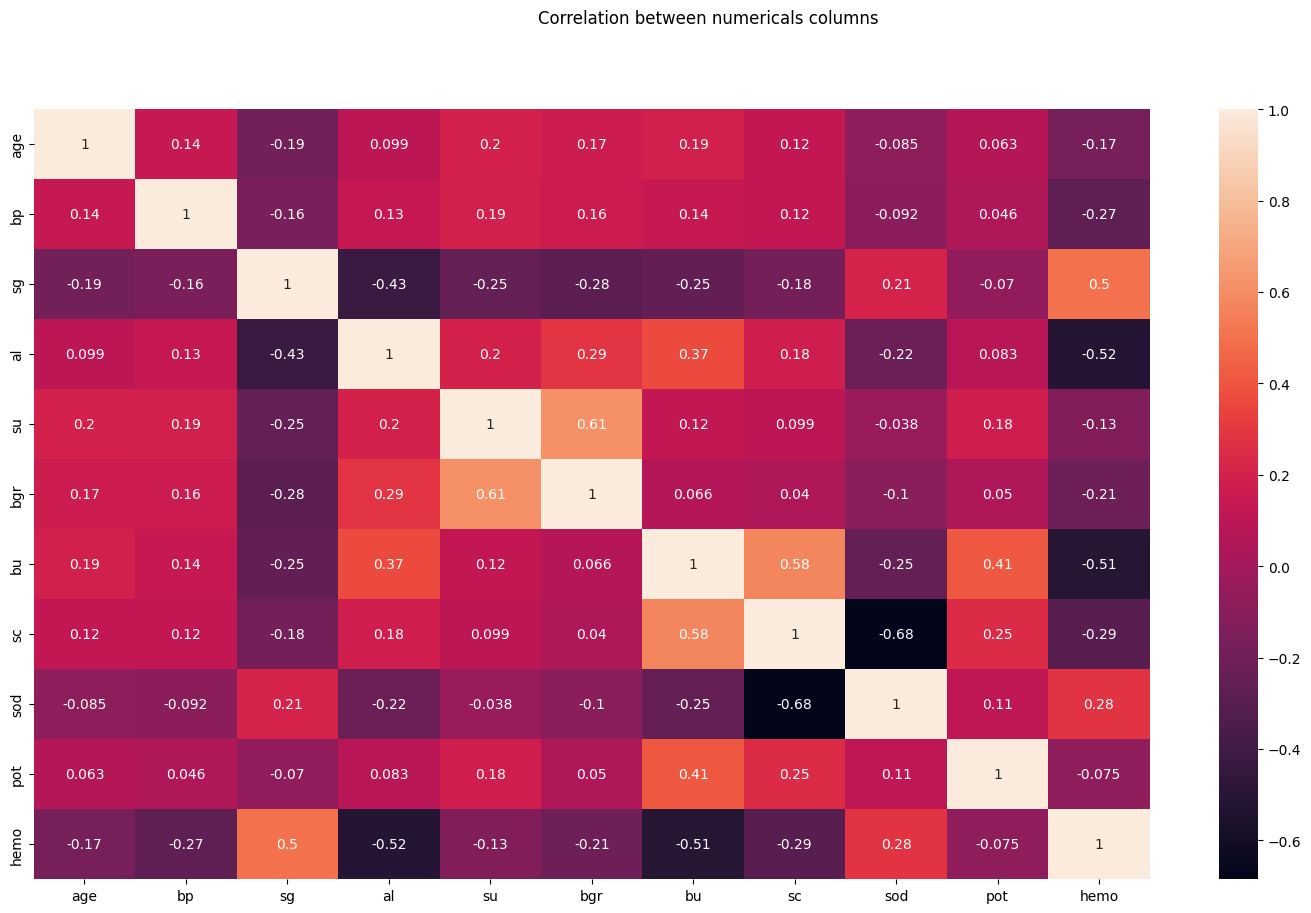

In [835]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num].corr(),annot=True)
plt.suptitle("Correlation between numericals columns")
plt.show()

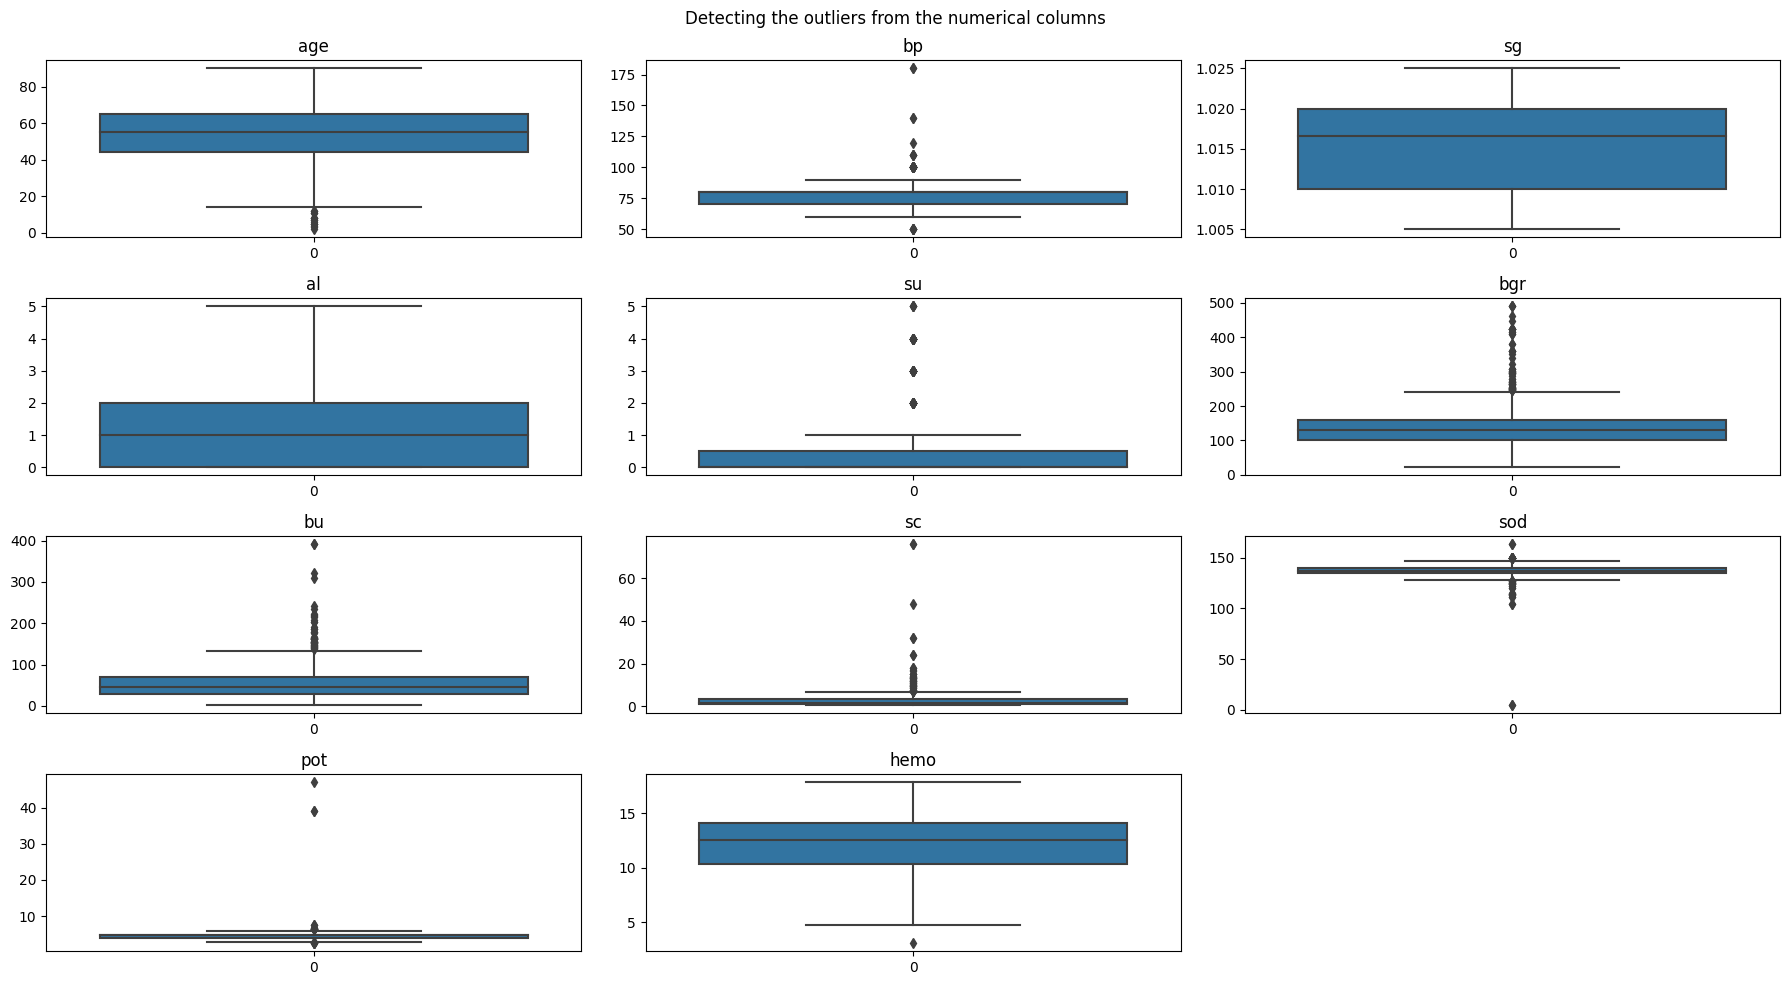

In [836]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[v])
    plt.title(v)
plt.suptitle("Detecting the outliers from the numerical columns")
plt.tight_layout()
plt.show()

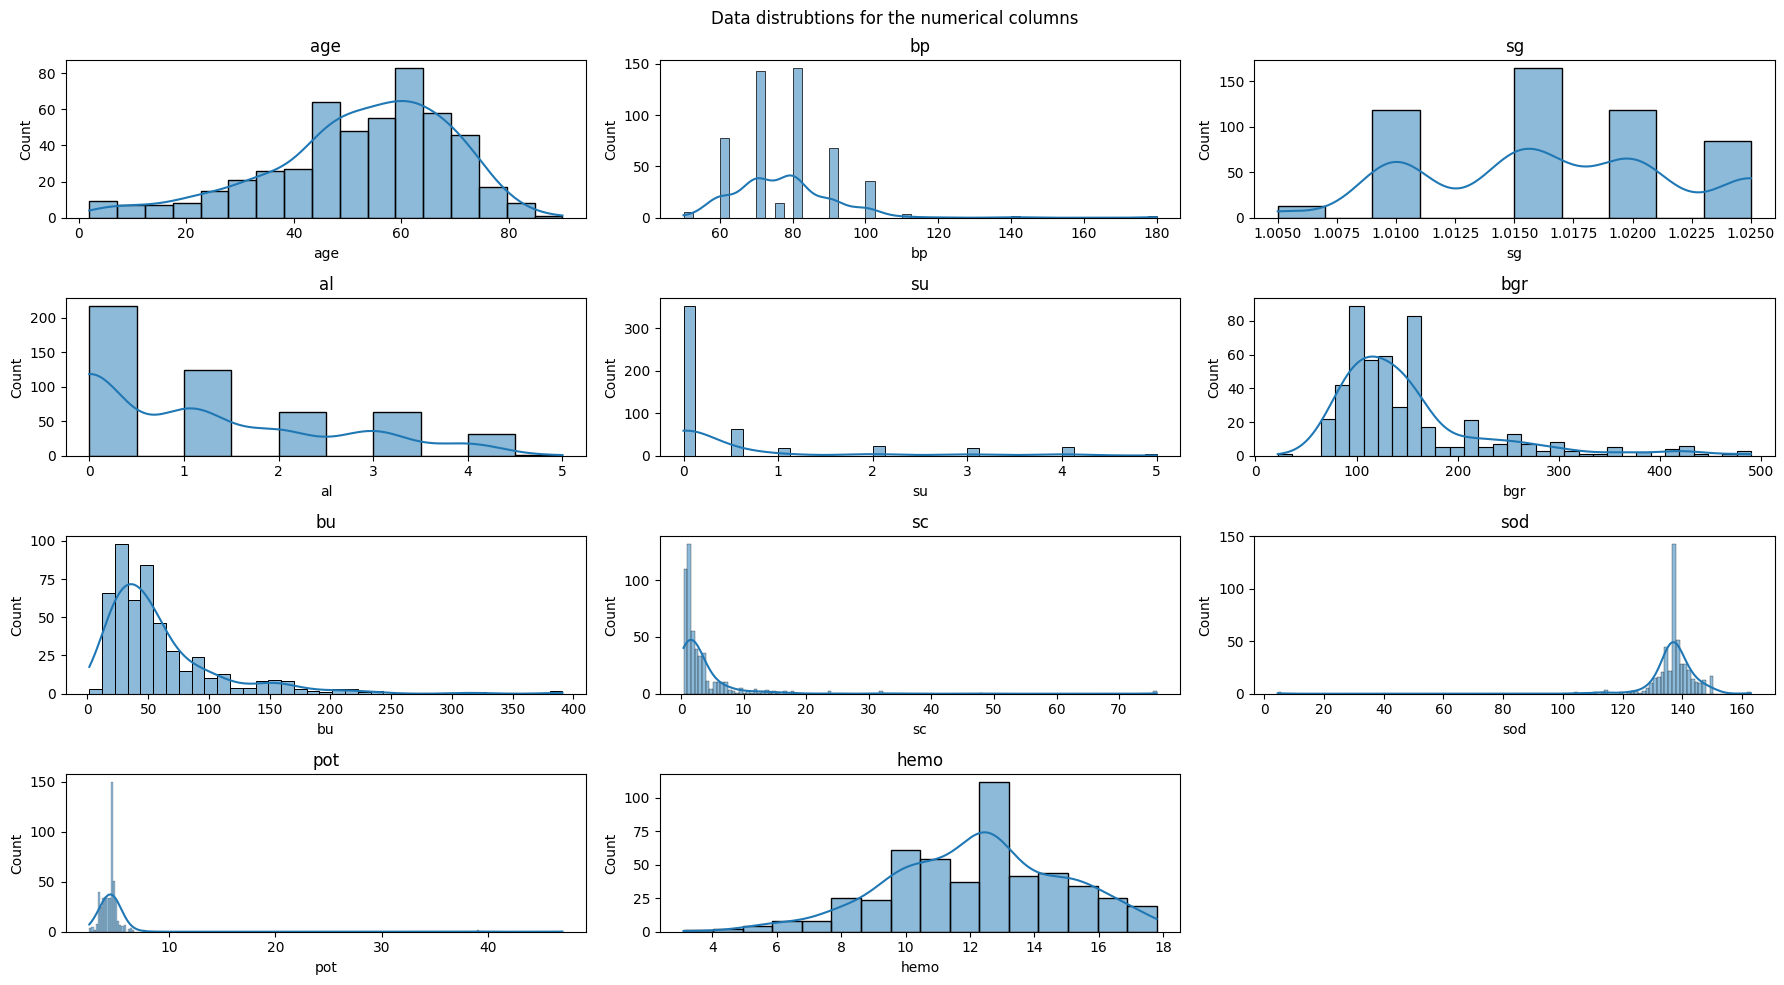

In [837]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[v],kde=True)
    plt.title(v)
plt.suptitle("Data distrubtions for the numerical columns")
plt.tight_layout()
plt.show()

In [838]:
# plt.figure(figsize=(20,10)
# sns.pairplot(df)

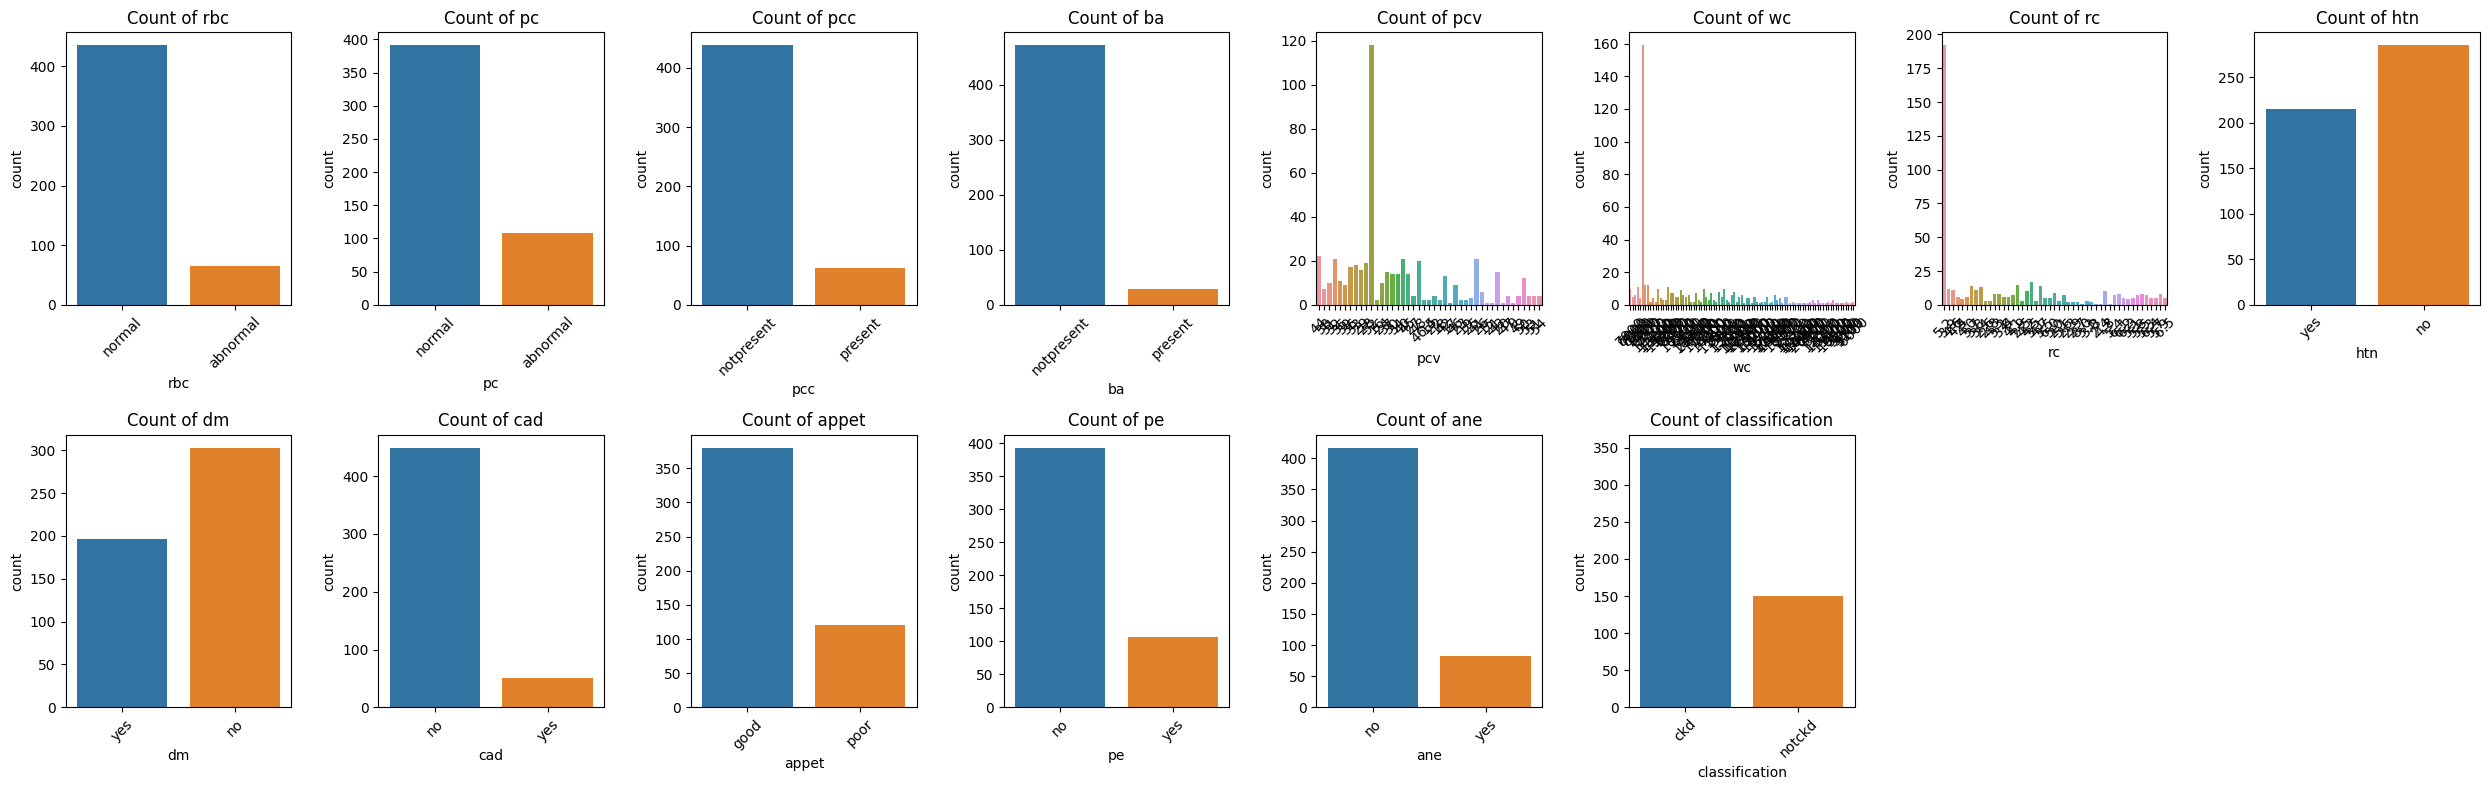

In [839]:
num_plots = len(cat)
rows = (num_plots + 7) // 8  # Calculate the number of rows needed

plt.figure(figsize=(25, rows * 4))  # Adjust the figure size based on the number of rows

for i, col in enumerate(cat, start=1):
    plt.subplot(rows, 8, i)  # Adjust the subplot position
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### **3. Data Splitting**

In [840]:
df.to_csv("Chronic_kidney_disease(clean_ds5200).csv")

In [841]:
from sklearn.model_selection import train_test_split,GridSearchCV
##preprocessing libraries from sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
## model train libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
##import the pipeline
from sklearn.pipeline import Pipeline
## importing the columnstransformer
from sklearn.compose import ColumnTransformer
##importing the model evaluations
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_curve

In [842]:
new_df=df.copy()

In [843]:
new_df.shape

(500, 25)

In [844]:
X=new_df.drop(columns='classification')
y=new_df['classification']

In [845]:
le=LabelEncoder()

In [846]:
y=le.fit_transform(y)

In [847]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [848]:
print("X_train shape:- ",X_train.shape," X_test shape:- ",X_test.shape," y_train shape:- ",y_train.shape," y_test shape:- ",y_test.shape)

X_train shape:-  (335, 24)  X_test shape:-  (165, 24)  y_train shape:-  (335,)  y_test shape:-  (165,)


#### **M-1**

In [849]:
lgr=LogisticRegression()

In [850]:
cat_i

[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [851]:
onh = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
stc=StandardScaler()

tf1=ColumnTransformer([
    ('onh',onh,[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
],remainder='passthrough')


tf2=ColumnTransformer([
    ('stc',stc,slice(0,None)),
],remainder='passthrough')

In [852]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lgr',lgr),
])

In [853]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lgr', LogisticRegression())])

In [854]:
y_pred_lgr=pipe_lgr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [855]:
score_lgr=accuracy_score(y_test,y_pred_lgr)
print("Score of Logistic Regression:- ",score_lgr)

Score of Logistic Regression:-  0.9878787878787879


In [856]:
score_train_lgr=pipe_lgr.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_lgr)

Score on Training dataset:-  1.0


In [857]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.98      0.98      0.98        45

    accuracy                           0.99       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.99      0.99      0.99       165



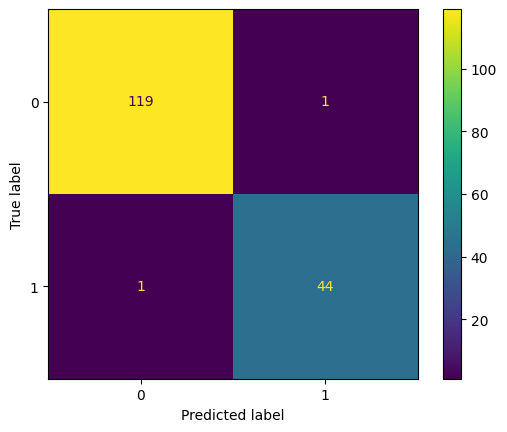

In [858]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

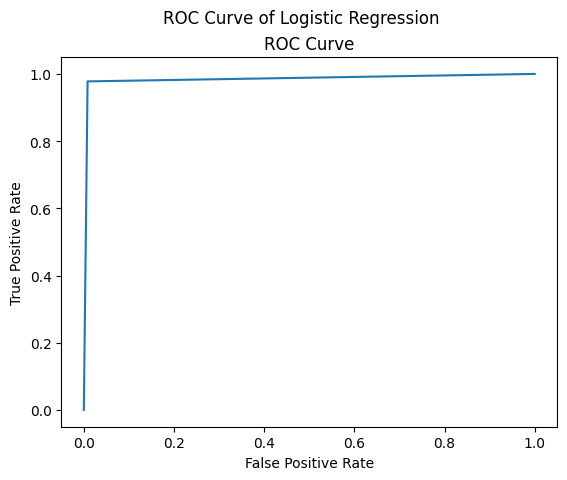

In [859]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgr)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Logistic Regression")
plt.show()

### M-2

In [860]:
knn=KNeighborsClassifier(n_neighbors=10)

In [861]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [862]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [863]:
y_pred_knn=pipe_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [864]:
score_knn=accuracy_score(y_test,y_pred_knn)
print("Score of knn:- ",score_knn)

Score of knn:-  0.793939393939394


In [865]:
score_train_knn=pipe_knn.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_knn)

Score on Training dataset:-  0.7850746268656716


In [866]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       120
           1       1.00      0.24      0.39        45

    accuracy                           0.79       165
   macro avg       0.89      0.62      0.63       165
weighted avg       0.84      0.79      0.74       165



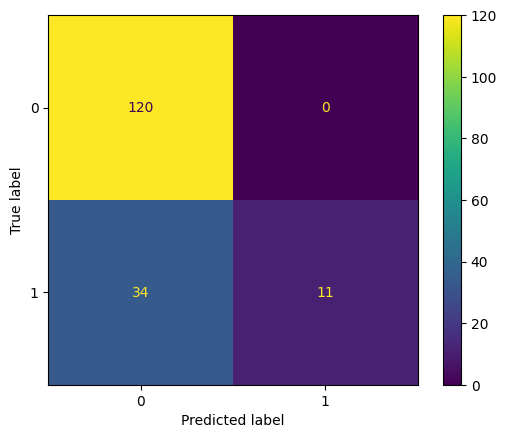

In [867]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

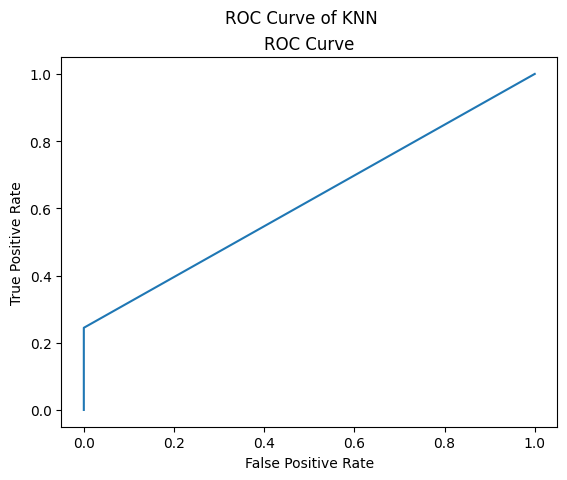

In [868]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of KNN")
plt.show()

### **M-3**

In [869]:
svc=SVC()

In [870]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [871]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [872]:
y_pred_svc=pipe_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [873]:
score_svc=accuracy_score(y_test,y_pred_svc)
print("Score of svc:- ",score_svc)

Score of svc:-  0.9878787878787879


In [874]:
score_train_svc=pipe_svc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_svc)

Score on Training dataset:-  0.9940298507462687


In [875]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.96      0.98        45

    accuracy                           0.99       165
   macro avg       0.99      0.98      0.98       165
weighted avg       0.99      0.99      0.99       165



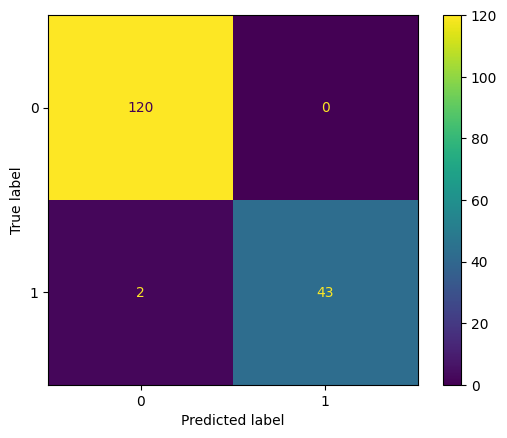

In [876]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

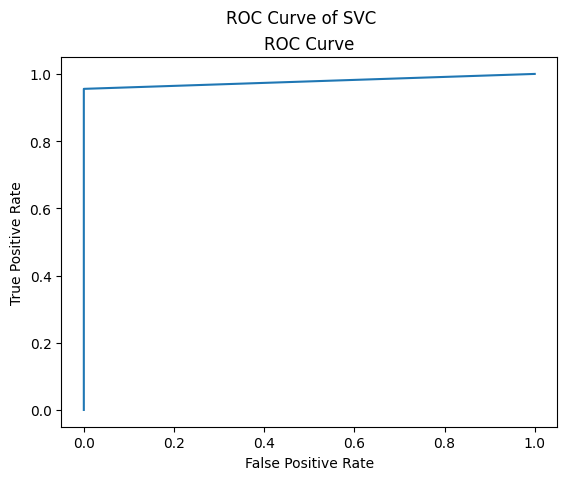

In [877]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of SVC")
plt.show()

### **M-4**

In [878]:
dtc=DecisionTreeClassifier()
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [879]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [880]:
y_pred_dtc=pipe_dtc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [881]:
score_dtc=accuracy_score(y_test,y_pred_dtc)
print("Score of Decision tree:- ",score_dtc)

Score of Decision tree:-  0.9696969696969697


In [882]:
score_train_dtc=pipe_dtc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_dtc)

Score on Training dataset:-  1.0


In [883]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.93      0.96      0.95        45

    accuracy                           0.97       165
   macro avg       0.96      0.97      0.96       165
weighted avg       0.97      0.97      0.97       165



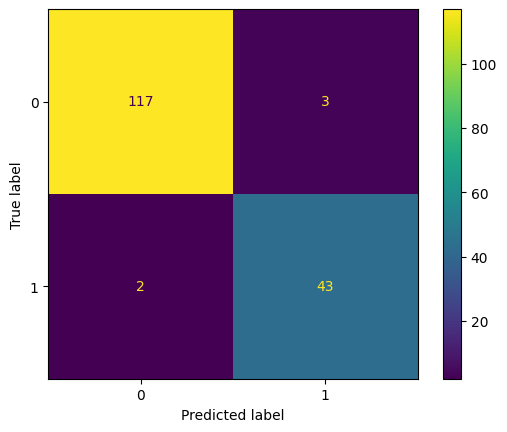

In [884]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

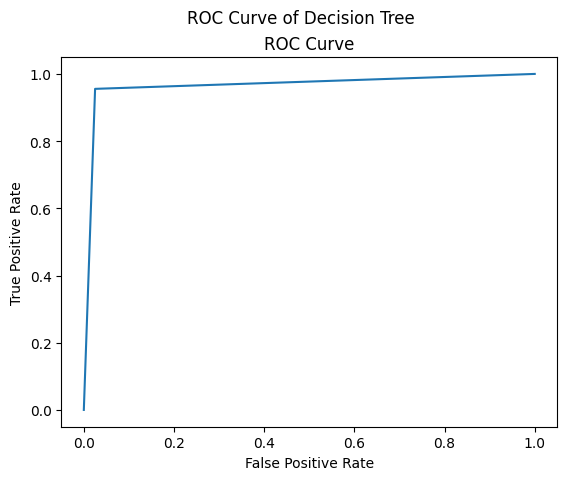

In [885]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Decision Tree")
plt.show()

### **M-5**

In [886]:
rfc=RandomForestClassifier()
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rfc',rfc)
])

In [887]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rfc', RandomForestClassifier())])

In [888]:
y_pred_rfc=pipe_rfc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [889]:
score_rfc=accuracy_score(y_test,y_pred_rfc)
print("Score of Random forest(Testing dataset):- ",score_rfc)

Score of Random forest(Testing dataset):-  0.9818181818181818


In [890]:
score_train_rfc=pipe_rfc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_rfc)

Score on Training dataset:-  1.0


In [891]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.98      0.96      0.97        45

    accuracy                           0.98       165
   macro avg       0.98      0.97      0.98       165
weighted avg       0.98      0.98      0.98       165



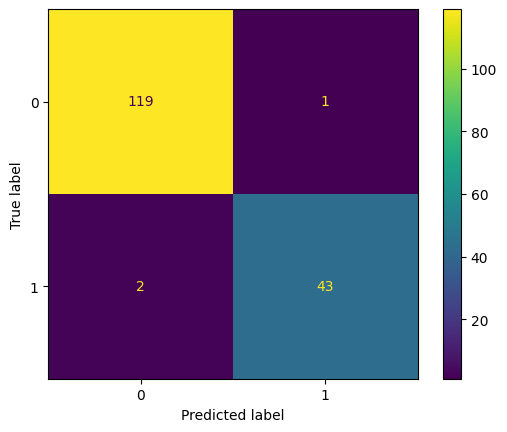

In [892]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

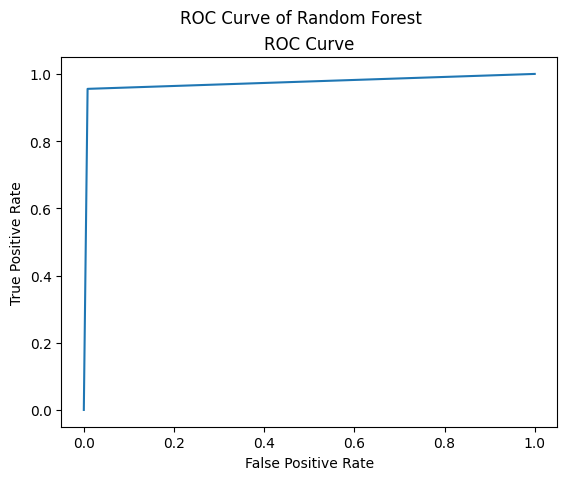

In [893]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Random Forest")
plt.show()

### **M-6**

In [894]:
bgg=BaggingClassifier(estimator=rfc)

pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('bgg',bgg)
])

In [895]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('bgg', BaggingClassifier(estimator=RandomForestClassifier()))])

In [896]:
y_pred_bgg=pipe_bgg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [897]:
score_bgg=accuracy_score(y_test,y_pred_bgg)
print("Score of Bagging with Random Forest:- ",score_bgg)

Score of Bagging with Random Forest:-  0.9818181818181818


In [898]:
score_train_bgg=pipe_bgg.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_bgg)

Score on Training dataset:-  0.9970149253731343


In [899]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.98      0.96      0.97        45

    accuracy                           0.98       165
   macro avg       0.98      0.97      0.98       165
weighted avg       0.98      0.98      0.98       165



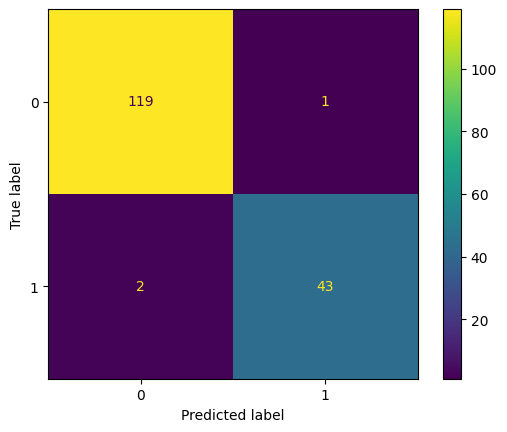

In [900]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

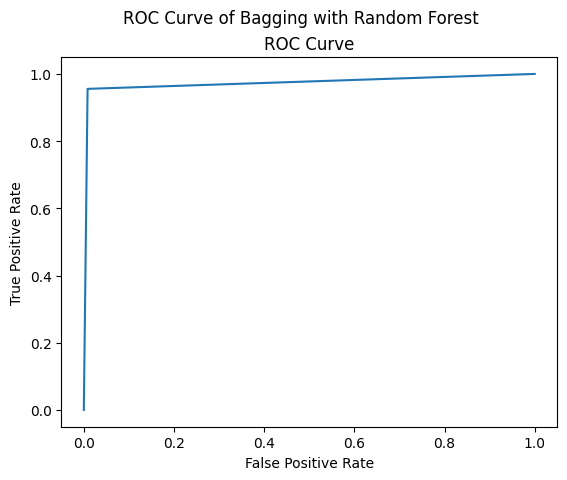

In [901]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bgg)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Bagging with Random Forest")
plt.show()

### **M-7**

In [902]:
ada=AdaBoostClassifier()
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('ada',ada)
])

In [903]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('ada', AdaBoostClassifier())])

In [904]:
y_pred_ada=pipe_ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [905]:
score_ada=accuracy_score(y_test,y_pred_ada)
print("Score of AdaBoosting Classifier(Testing score):- ",score_ada)

Score of AdaBoosting Classifier(Testing score):-  1.0


In [906]:
score_train_ada=pipe_ada.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_ada)

Score on Training dataset:-  1.0


In [907]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        45

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



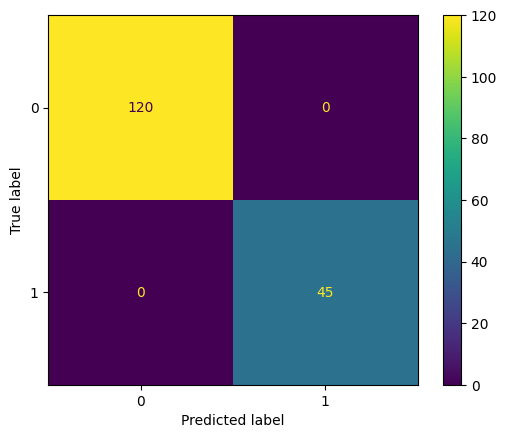

In [908]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

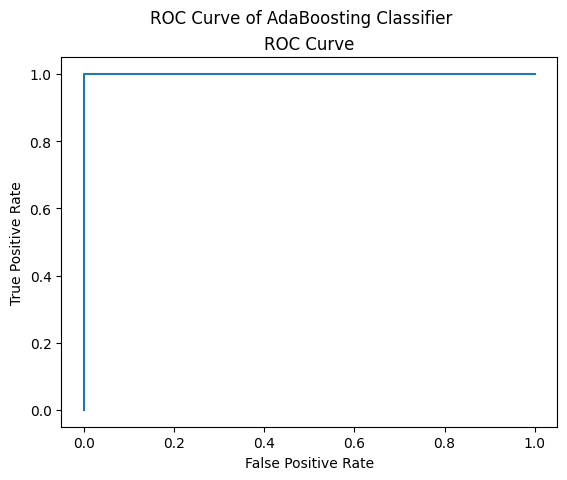

In [909]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of AdaBoosting Classifier")
plt.show()

### **M-8**

In [910]:
grd_en=GradientBoostingClassifier()

pipe_grd_en=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('grd_en',grd_en)
])

In [911]:
pipe_grd_en.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('grd_en', GradientBoostingClassifier())])

In [912]:
y_pred_grd_en=pipe_grd_en.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [913]:
score_grd=accuracy_score(y_test,y_pred_grd_en)
print("Score of Gradient BoostingClassifier:- ",score_grd)

Score of Gradient BoostingClassifier:-  0.9939393939393939


In [914]:
score_train_grd=pipe_grd_en.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  [0.01538434810936451, 1.0]


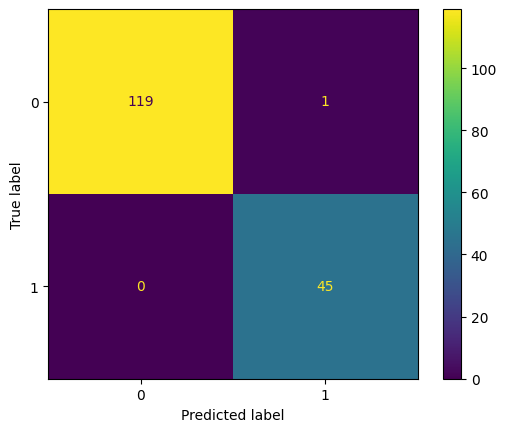

In [915]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_grd_en)).plot()

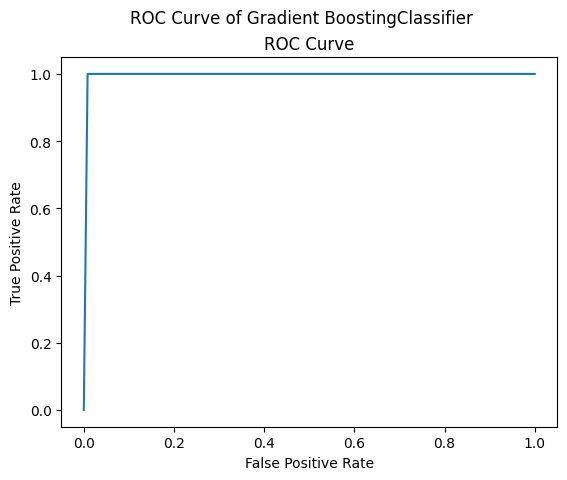

In [916]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grd_en)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Gradient BoostingClassifier")
plt.show()

### **M-9**

In [917]:
xgb=XGBClassifier()

pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgb',xgb)
])

In [918]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgb',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [919]:
y_pred_xgb=pipe_xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [920]:
score_xgb=accuracy_score(y_test,y_pred_xgb)
print("Score of XGBoosting classifier:- ",score_xgb)

Score of XGBoosting classifier:-  0.9939393939393939


In [921]:
score_train_xgb=pipe_xgb.score(X_train,y_train)
print("Score on Training dataset:- ",score_train)

Score on Training dataset:-  [0.01538434810936451, 1.0]


In [922]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.98      1.00      0.99        45

    accuracy                           0.99       165
   macro avg       0.99      1.00      0.99       165
weighted avg       0.99      0.99      0.99       165



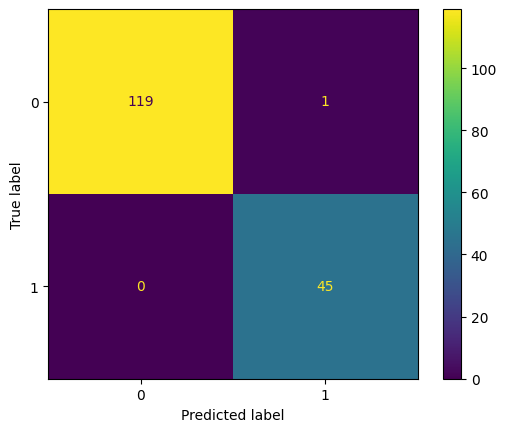

In [923]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

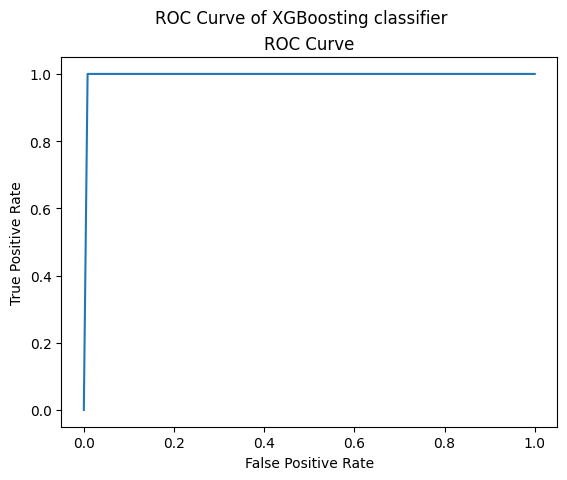

In [924]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of XGBoosting classifier")
plt.show()

In [925]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier'],
    'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb],
    'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb],
}

In [926]:
pd.DataFrame(s)

,Model Name,Test Score,Train Score
0,Logistic Regression,0.987879,1.000000
1,KNN,0.793939,0.785075
2,SVC,0.987879,0.994030
3,Decision Tree,0.969697,1.000000
4,Random Forest,0.981818,1.000000
5,Bagging classifier,0.981818,0.997015
6,AdaBoosting Classifier,1.000000,1.000000
7,Gradient_Boosting classifier,0.993939,1.000000
8,XGBoosting classifier,0.993939,1.000000


#### **ANN-Implementation**

In [927]:
X_train_onh=onh.fit_transform(X_train)
X_test_onh=onh.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [928]:
X_train_scaled=stc.fit_transform(X_train_onh)
X_test_scaled=stc.transform(X_test_onh)

In [929]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [930]:
##model init
model=Sequential()

##model creating
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [931]:
##model compiling
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [932]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test),batch_size=64)

Epoch 1/50
6/6 [==============================] - 4s 111ms/step - loss: 0.9266 - accuracy: 0.4985 - val_loss: 0.8204 - val_accuracy: 0.3818
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 0.7462 - accuracy: 0.6090 - val_loss: 0.7631 - val_accuracy: 0.3818
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 0.7317 - accuracy: 0.6030 - val_loss: 0.7094 - val_accuracy: 0.4909
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.7689 - accuracy: 0.6030 - val_loss: 0.6621 - val_accuracy: 0.6182
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.5941 - accuracy: 0.6896 - val_loss: 0.6258 - val_accuracy: 0.7030
Epoch 6/50
6/6 [==============================] - 0s 22ms/step - loss: 0.5790 - accuracy: 0.7164 - val_loss: 0.5900 - val_accuracy: 0.7697
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.5615 - accuracy: 0.7522 - val_loss: 0.5537 - val_accuracy: 0.8061
Epoch 8/50
6/6 [==========

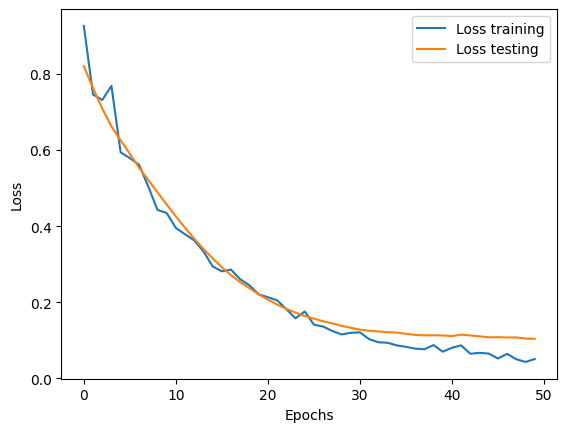

In [933]:
plt.plot(history.history['loss'],label='Loss training')
plt.plot(history.history['val_loss'],label='Loss testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

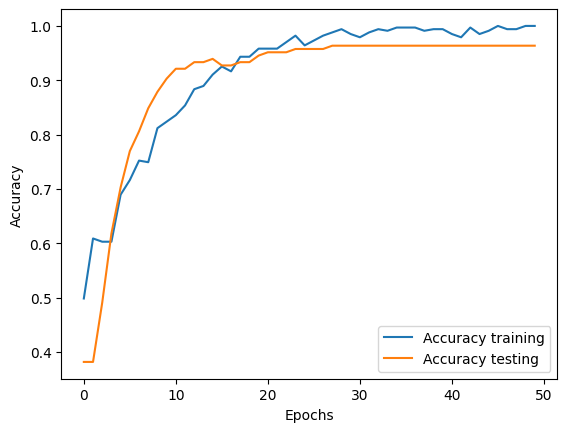

In [934]:
plt.plot(history.history['accuracy'],label='Accuracy training')
plt.plot(history.history['val_accuracy'],label='Accuracy testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [935]:
y_pred_ann=model.predict(X_test_scaled)

6/6 [==============================] - 0s 3ms/step


In [936]:
threshold=0.5

y_pred_ann=(y_pred_ann >= threshold).astype(int)

In [937]:
score_ann=accuracy_score(y_test,y_pred_ann)
print("Score of ANN(Testing):- ",score_ann)

Score of ANN(Testing):-  0.9636363636363636


In [938]:
score_train_ann=model.evaluate(X_train_scaled,y_train)
print("Score on Training dataset:- ",score_train_ann[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 1.0000
Score on Training dataset:-  1.0


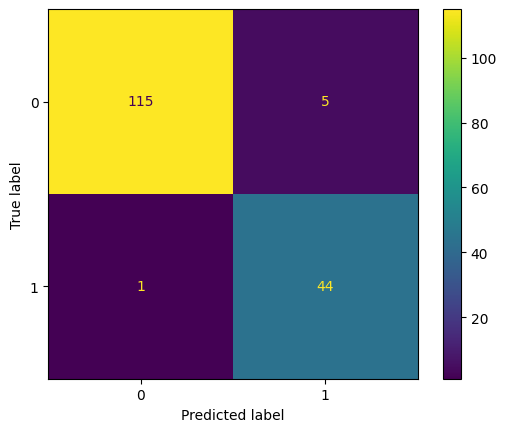

In [939]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

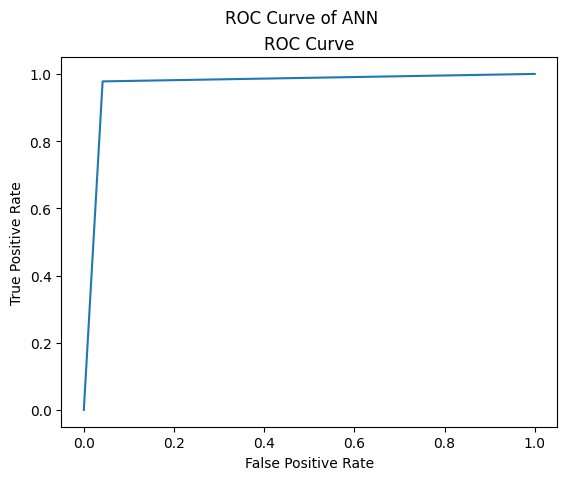

In [940]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of ANN")
plt.show()

In [941]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
    'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann],
    'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb,score_train_ann[1]],
}

In [942]:
pd.DataFrame(s)

,Model Name,Test Score,Train Score
0,Logistic Regression,0.987879,1.000000
1,KNN,0.793939,0.785075
2,SVC,0.987879,0.994030
3,Decision Tree,0.969697,1.000000
4,Random Forest,0.981818,1.000000
5,Bagging classifier,0.981818,0.997015
6,AdaBoosting Classifier,1.000000,1.000000
7,Gradient_Boosting classifier,0.993939,1.000000
8,XGBoosting classifier,0.993939,1.000000
9,ANN,0.963636,1.000000
